# Jupyter pour analyser les sorties de modèle

In [1]:
using Test, LinearAlgebra, PlutoUI, Plots, NCDatasets , JuMP , CPLEX, AmplNLWriter, Statistics, NCDatasets,  FilesystemDatastructures, JLD
using Plots.PlotMeasures # charger le module 


## Ajout des fonctions clefs

In [2]:
include("extract_data_from_netcdf.jl")
include("extract_data_from_netcdf_hydro.jl")
include("solve_unit_commitment_hydro.jl")

solve_unit_commitment_hydro (generic function with 1 method)

In [48]:
file = "T-ramp/10_0_1_w.nc4" # Entrer le fichier à étudier
ncfile = file[8:length(file)]

"10_0_1_w.nc4"

## Run optimisation

In [49]:
T, m, Δt, ThUnits, min_power, max_power, delta_ramp_up, delta_ramp_down, start_up_cost, linear_term, const_term, quad_term, d, InitUpDownTime, MinDownTime, MinUpTime, InitialPower = extract_data_from_netcdf(file)
StartArc, EndArc, Inflows, InitialVolume, MaxVolume, InitialFlowRate, DeltaRampUp_hydro, DeltaRampDown_hydro, MinFlow, MaxFlow, MinPower, MaxPower,LinearTerm_hydro,ConstantTerm_hydro =extract_data_from_netcdf_hydro("T-ramp/Aurland_1000.nc4")
solution_x, solution_p, solution_cost, solution_xhydro, solution_phydro, solution_f , solution_v = solve_unit_commitment_hydro(InitialPower,T, m, Δt, ThUnits, min_power, max_power, delta_ramp_up, delta_ramp_down, start_up_cost, linear_term, const_term, quad_term, d, InitUpDownTime,MinDownTime,MinUpTime,StartArc, EndArc, Inflows, InitialVolume, MaxVolume, InitialFlowRate, DeltaRampUp_hydro, DeltaRampDown_hydro, MinFlow, MaxFlow, MinPower, MaxPower,LinearTerm_hydro,ConstantTerm_hydro)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
Tried aggregator 3 times.
MIP Presolve eliminated 3302 rows and 1379 columns.
MIP Presolve modified 1324 coefficients.
Aggregator did 147 substitutions.
Reduced MIP has 1215 rows, 442 columns, and 3382 nonzeros.
Reduced MIP has 160 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (9.55 ticks)
Found incumbent of value 1159876.355664 after 0.05 sec. (11.40 ticks)
Probing changed sense of 96 constraints.
Probing time = 0.02 sec. (3.52 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 180 rows and 96 columns.
MIP Presolve modified 213 coefficients.
Reduced MIP has 1035 rows, 346 columns, and 2863 nonzeros.
Reduced MIP has 64 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.43 ticks)
Probing time = 0.00 sec. (1.17 ticks)
Cover probing fixed 0 vars, tightened 17 bounds.
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve modified 39 coefficients.
Reduced MIP has 1035 row

([0.9999999999999986 0.9999999999999986 … 0.0 0.0; 1.0 1.0 … 1.0 1.0; … ; 0.0 -0.0 … 0.0 0.0; -2.0015288331270283e-16 -2.0015288331270283e-16 … 0.0 0.0], [414.0 31.99999999999996 … 0.0 0.0; 74.666609 37.0 … 73.390287 37.0; … ; 0.0 0.0 … 0.0 0.0; 118.674849 -1.681284219826704e-14 … 0.0 0.0], [0.0 2719.2123639999963 … 0.0 0.0; 0.0 3030.863826 … 4671.581633321752 3030.863826; … ; 0.0 0.0 … 0.0 0.0; 0.0 -1.5257114056275399e-12 … 0.0 0.0], [1.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0; … ; 1.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0], [0.0 8.997660000000002 … 8.997660000000002 9.0; 0.0 -5.195843755245733e-14 … 0.0 0.0; … ; 0.0 279.99000000000007 … 279.99000000000007 280.0; 0.0 279.99000000000007 … 279.99000000000007 280.0], [0.0 0.009324 … 0.009324 0.00932642487046632; 0.0 -4.440892098500626e-16 … 0.0 0.0; … ; 0.0 0.13500000000000004 … 0.13500000000000004 0.13500482160077146; 0.0 0.13500000000000004 … 0.13500000000000004 0.13500482160077146], [1.5 1.5006246050547054 … 0.0 0.0; 224.0 223.77918327717097 … 2

# Analyse

Calculs préalables

In [60]:
p_turbine = Array{Float64}(undef,length(StartArc),T) 
p_pompage = Array{Float64}(undef, length(StartArc),T)
for i in 1:length(StartArc)
    for t in 1:T
        p_turbine[i,t]=(solution_phydro[i,t]+abs(solution_phydro[i,t]) )/2
        p_pompage[i,t]=(-solution_phydro[i,t]+abs(solution_phydro[i,t]) )/2
        
    end
end

Graphe Equilibre Offre demande 

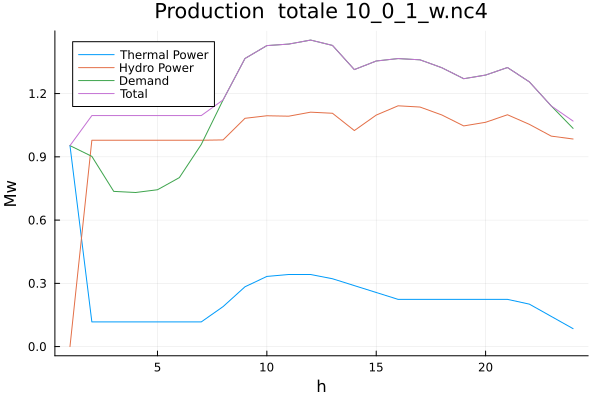

In [61]:

thermal_power = sum(solution_p[i,:] for i in 1:length(ThUnits))/1000
hydro_power = sum(solution_phydro[i,:] for i in 1:length(StartArc))/1000
total = hydro_power+thermal_power

plot([thermal_power hydro_power d/1000 total],label = ["Thermal Power" "Hydro Power" "Demand" "Total"])
title!("Production  totale $ncfile")
xlabel!("h")
ylabel!("Mw")
# savefig("\image")
# plot([total])


Graph prod hydro 

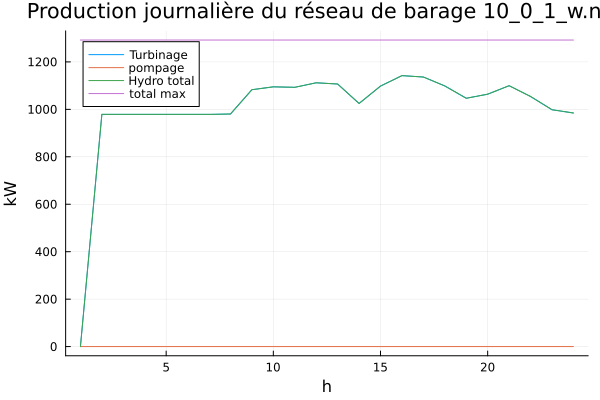

In [62]:
hydro_power = sum(solution_phydro[i,:] for i in 1:length(StartArc))
turbine_power = sum(p_turbine[i,:] for i in 1:length(StartArc))
pumping_power = sum(p_pompage[i,:] for i in 1:length(StartArc))
            
Max = sum(MaxPower)
Max_24 = fill(1,24)*Max
plot([turbine_power pumping_power hydro_power Max_24],label = ["Turbinage" "pompage" "Hydro total" "total max"])
title!("Production journalière du réseau de barage $ncfile")
xlabel!("h")
ylabel!("kW")

Graph prod thermique

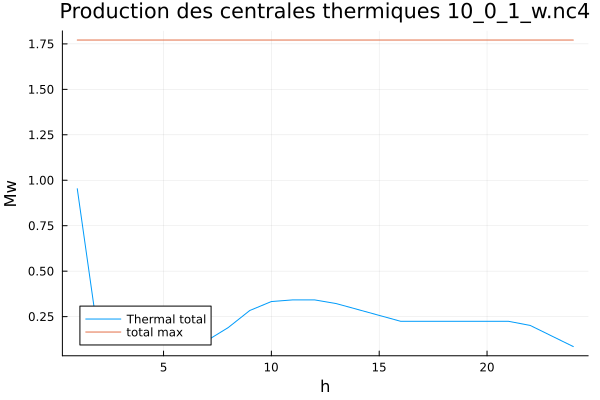

In [63]:
thermal_power = sum(solution_p[i,:] for i in 1:length(ThUnits))/1000
Max_p = sum(max_power)
Max_p_24 = fill(1,24)*Max_p/1000
plot([thermal_power Max_p_24],label = ["Thermal total" "total max"])
title!("Production des centrales thermiques $ncfile")
xlabel!("h")
ylabel!("Mw")

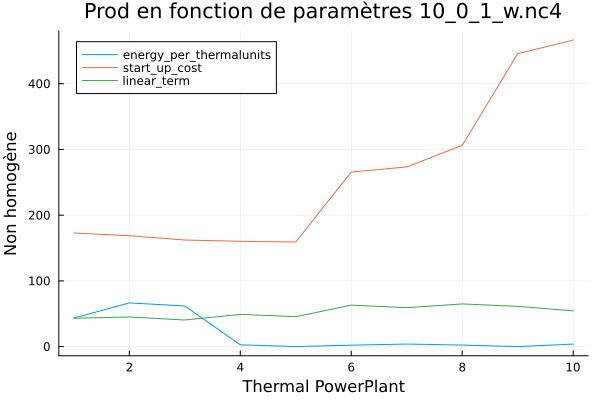

In [64]:
energy_per_thermalunits = float(fill(1,length(ThUnits)))
for i in 1:length(ThUnits)
    energy_per_thermalunits = 250*sum(solution_p[:,t] for t in 1:T)/(max_power[i]*T)
end

plot([energy_per_thermalunits,start_up_cost,linear_term], label = ["energy_per_thermalunits" "start_up_cost" "linear_term"])
title!("Prod en fonction de paramètres $ncfile")
ylabel!("Non homogène")
xlabel!("Thermal PowerPlant")

#### Analyse par thermal plant

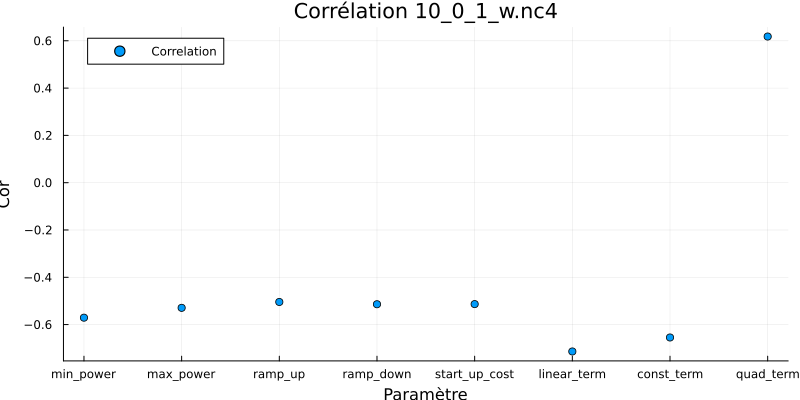

In [65]:
L =[min_power, max_power, delta_ramp_up, delta_ramp_down, start_up_cost, linear_term, const_term, quad_term]
correlation = float(fill(1,length(L)))
for i in 1:length(L)
    correlation[i]=cor(energy_per_thermalunits,L[i])
end
Names =["min_power", "max_power", "ramp_up", "ramp_down", "start_up_cost" ,"linear_term" ,"const_term" ,"quad_term"]
plot(Names,correlation,seriestype=:scatter,label ="Correlation",size=(800,400))

title!("Corrélation $ncfile")
xlabel!("Paramètre")
ylabel!("Cor")   

#### Analyse Hydro

In [67]:
loss = Array{Float64}(undef,6,T-1) 
for i in 1:6
    for t in 1:23
        loss[i,t]=solution_v[i,t+1]-solution_v[i,t]
    end
end
# Plots.plot(solution_v')

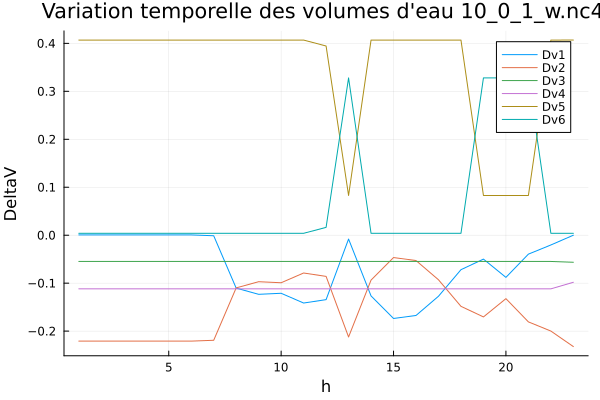

In [68]:
plot(loss',label = ["Dv1" "Dv2" "Dv3" "Dv4" "Dv5" "Dv6"])
title!("Variation temporelle des volumes d'eau $ncfile ")
xlabel!("h")
ylabel!("DeltaV")

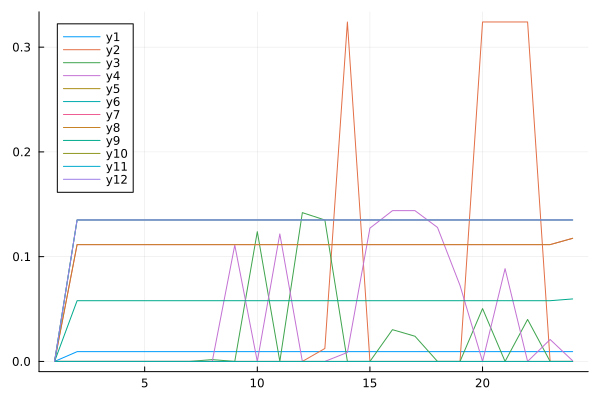

In [69]:
plot(solution_f')